In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

In [2]:
def limpiar_dataframe(nombre,nombre_salida):
    df = pd.read_csv(nombre,index_col=0)
    df["Arrival Delay in Minutes"] = df["Arrival Delay in Minutes"].fillna(0)
    df = df.drop(columns=['id'])
    #convertimos datos gender male a 0 y female a 1
    df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})
    #convertimos customer type 0 loyal customer y 1 disloyal customer
    df["Customer Type"] = df["Customer Type"].map({"Loyal Customer": 0, "disloyal Customer": 1})
    #convertimos type of travel 0 personal travel y 1 business travel
    df["Type of Travel"] = df["Type of Travel"].map({"Personal Travel": 0, "Business travel": 1})
    #convertimos class 0 business, 1 eco y 2 eco plus
    df["Class"] = df["Class"].map({"Business": 0, "Eco": 1,"Eco Plus":2})
    #convertimos satisfaction 0 neutral or dissatisfied y 1 satisfied
    df["satisfaction"] = df["satisfaction"].map({"neutral or dissatisfied": 0, "satisfied": 1})
    df.to_csv(nombre_salida,index=False)

In [3]:
limpiar_dataframe("datasets/train.csv","datasets/clean_train.csv")
limpiar_dataframe("datasets/test.csv","datasets/clean_test.csv")

In [4]:
train_df = pd.read_csv("datasets/clean_train.csv")
test_df = pd.read_csv("datasets/clean_test.csv")

In [5]:
X_train = train_df.drop(columns=['satisfaction'])
y_train = train_df['satisfaction']
X_test = test_df.drop(columns=['satisfaction'])
y_test = test_df['satisfaction']

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),  
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

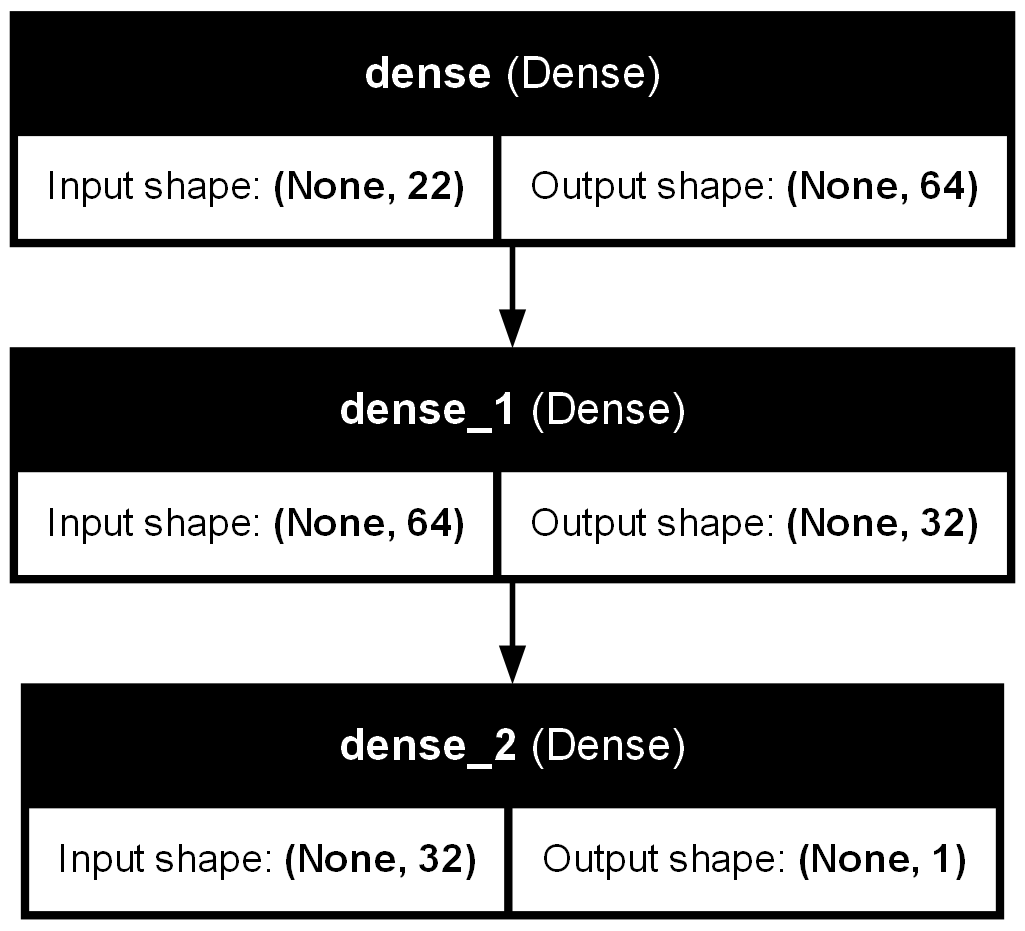

In [9]:
plot_model(model, to_file='model_architecture1.png', show_shapes=True, show_layer_names=True)

In [10]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8874 - loss: 0.2666 - val_accuracy: 0.9422 - val_loss: 0.1431
Epoch 2/50
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9417 - loss: 0.1411 - val_accuracy: 0.9490 - val_loss: 0.1237
Epoch 3/50
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9489 - loss: 0.1222 - val_accuracy: 0.9524 - val_loss: 0.1144
Epoch 4/50
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9536 - loss: 0.1103 - val_accuracy: 0.9507 - val_loss: 0.1135
Epoch 5/50
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9546 - loss: 0.1068 - val_accuracy: 0.9514 - val_loss: 0.1045
Epoch 6/50
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9578 - loss: 0.0991 - val_accuracy: 0.9573 - val_loss: 0.1003
Epoch 7/50
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9574 - loss: 0.0980 - val_accuracy: 0.9547 - val_loss: 0.1014
Epoch 8/50
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9599 - loss: 0.0934 - 

2598/2598 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9695 - loss: 0.0687 - val_accuracy: 0.9618 - val_loss: 0.0922


In [11]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

812/812 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [12]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.9615414228518633
Precision: 0.9726512811193895
Recall: 0.938788038235552
F1-Score: 0.9554196974429916


In [13]:
model_2 = Sequential([
    Input(shape=(X_train.shape[1],)),  
    Dense(256),
    LeakyReLU(negative_slope=0.1),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128),
    LeakyReLU(negative_slope=0.1),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64),
    LeakyReLU(negative_slope=0.1),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32),
    LeakyReLU(negative_slope=0.1),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])

In [14]:
model_2.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

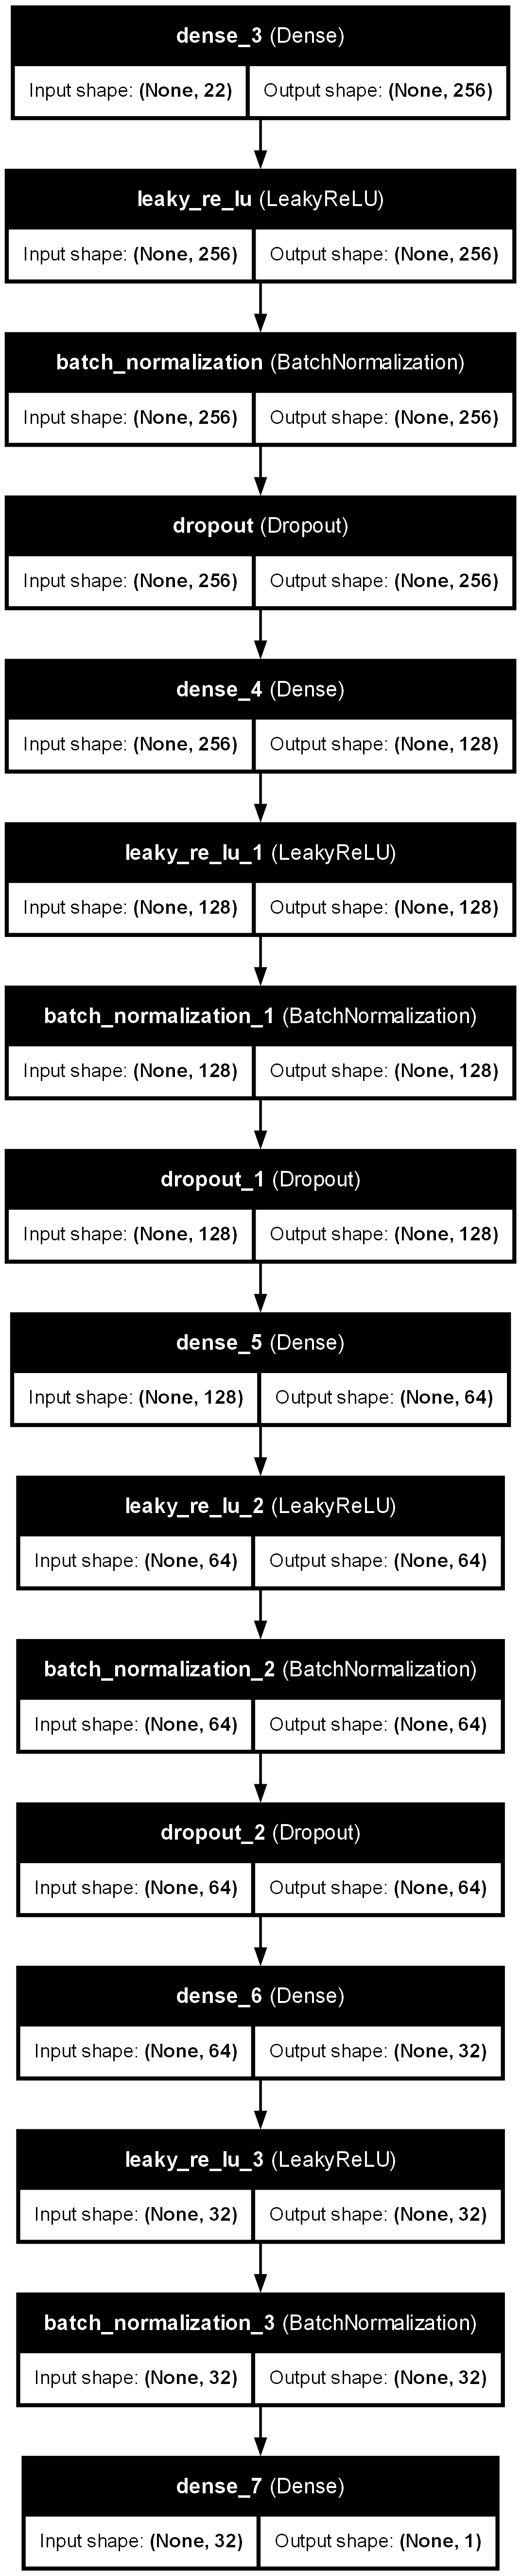

In [15]:
plot_model(model_2, to_file='model_architecture2.png', show_shapes=True, show_layer_names=True)

In [16]:
# Entrenamiento del modelo
history_2 = model_2.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.8072 - loss: 0.4301 - val_accuracy: 0.9286 - val_loss: 0.1864
Epoch 2/100
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.8944 - loss: 0.2594 - val_accuracy: 0.9355 - val_loss: 0.1597
Epoch 3/100
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.9093 - loss: 0.2272 - val_accuracy: 0.9398 - val_loss: 0.1494
Epoch 4/100
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.9151 - loss: 0.2133 - val_accuracy: 0.9443 - val_loss: 0.1413
Epoch 5/100
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9171 - loss: 0.2053 - val_accuracy: 0.9479 - val_loss: 0.1343
Epoch 6/100
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9225 - loss: 0.1964 - val_accuracy: 0.9494 - val_loss: 0.1290
Epoch 7/100
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.9222 - loss: 0.1900 - val_accuracy: 0.9515 - val_loss: 0.1236
Epoch 8/100
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.9272 -

2598/2598 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.9530 - loss: 0.1138 - val_accuracy: 0.9621 - val_loss: 0.0880
Epoch 51/100
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.9537 - loss: 0.1140 - val_accuracy: 0.9620 - val_loss: 0.0883
Epoch 52/100
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.9539 - loss: 0.1115 - val_accuracy: 0.9628 - val_loss: 0.0872
Epoch 53/100
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.9537 - loss: 0.1129 - val_accuracy: 0.9627 - val_loss: 0.0869
Epoch 54/100
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.9546 - loss: 0.1121 - val_accuracy: 0.9629 - val_loss: 0.0867
Epoch 55/100
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.9550 - loss: 0.1137 - val_accuracy: 0.9625 - val_loss: 0.0870
Epoch 56/100
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.9536 - loss: 0.1128 - val_accuracy: 0.9630 - val_loss: 0.0863
Epoch 57/100
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9537 - loss

2598/2598 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.9585 - loss: 0.0986 - val_accuracy: 0.9645 - val_loss: 0.0825
Epoch 100/100
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.9590 - loss: 0.0980 - val_accuracy: 0.9642 - val_loss: 0.0824


In [17]:
# Predicciones y cálculo de métricas adicionales
y_pred = (model_2.predict(X_test) > 0.5).astype("int32")

812/812 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


In [18]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.9635817677856483
Precision: 0.9744124852554215
Recall: 0.9417697097255109
F1-Score: 0.9578130574384588


In [19]:
# Matriz de confusión y reporte de clasificación
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print(cm)
print(cr)

[[14291   282]
 [  664 10739]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14573
           1       0.97      0.94      0.96     11403

    accuracy                           0.96     25976
   macro avg       0.97      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



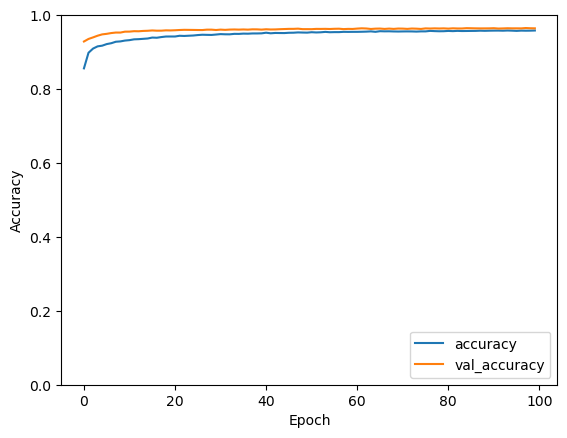

In [20]:
plt.plot(history_2.history['accuracy'], label='accuracy')
plt.plot(history_2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

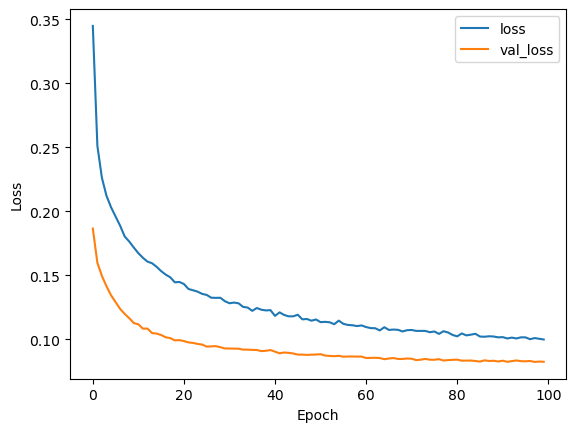

In [21]:
plt.plot(history_2.history['loss'], label='loss')
plt.plot(history_2.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

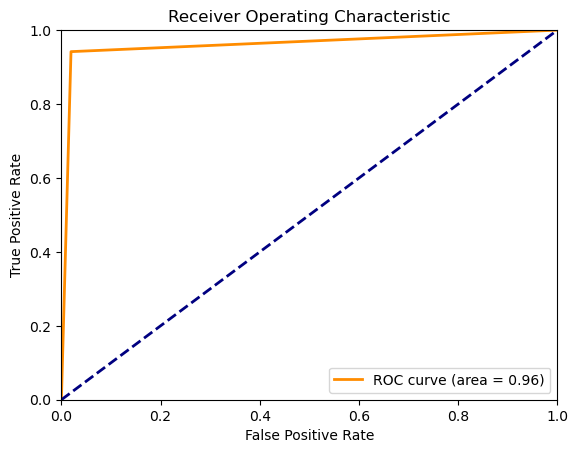

In [22]:
# Curva ROC y AUC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [23]:
# Nombres de las características (incluyendo 'satisfaction')
column_names = ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
                'Flight Distance', 'Inflight wifi service',
                'Departure/Arrival time convenient', 'Ease of Online booking',
                'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
                'Inflight entertainment', 'On-board service', 'Leg room service',
                'Baggage handling', 'Checkin service', 'Inflight service',
                'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
nuevos_datos = np.array([[0, 0, 13, 0, 2, 460, 3, 4, 3, 1, 5, 3, 5, 5, 4, 3, 4, 4, 5, 25, 10, 0]])
nuevos_datos_df = pd.DataFrame(nuevos_datos, columns=column_names)

nuevos_datos_escalados = scaler.transform(nuevos_datos_df)

prediccion = model_2.predict(nuevos_datos_escalados)

print(f"Predicción de satisfacción: {prediccion[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicción de satisfacción: 0.9853907823562622
